In [1]:
from time import time

import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from tools.common_methods import get_train_test_data, print_results

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [3]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train_std, y_train)

y_pred = gbr.predict(X_test_std)

print_results(y_test, y_pred)

MSE: 95.50899046748748 	R2 score: 0.9384481398588886


Text(0.5, 1.0, 'Feature Importance')

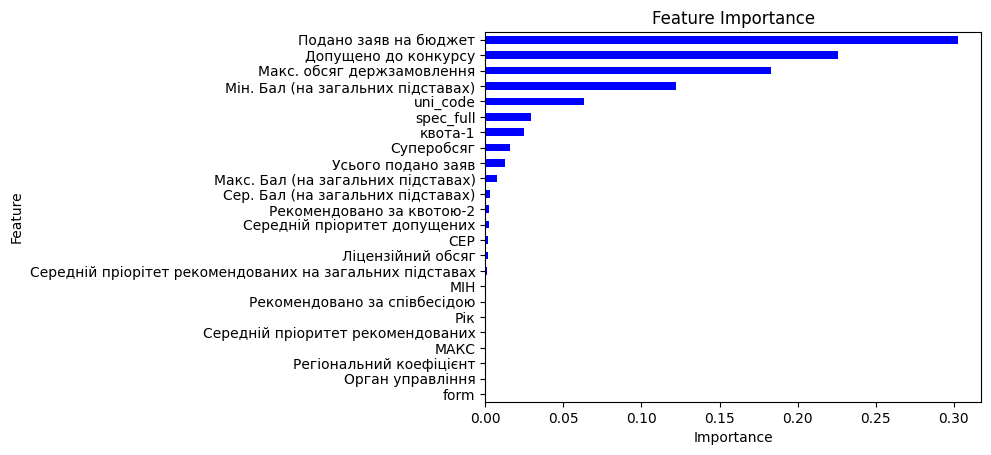

In [11]:
importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [15]:
gbr = GradientBoostingRegressor(random_state=1, max_depth=10)
gbr.fit(X_train_std, y_train)

y_pred = gbr.predict(X_test_std)

print_results(y_test, y_pred)

MSE: 50.95407487690587 	R2 score: 0.9671620642717329


Text(0.5, 1.0, 'Feature Importance')

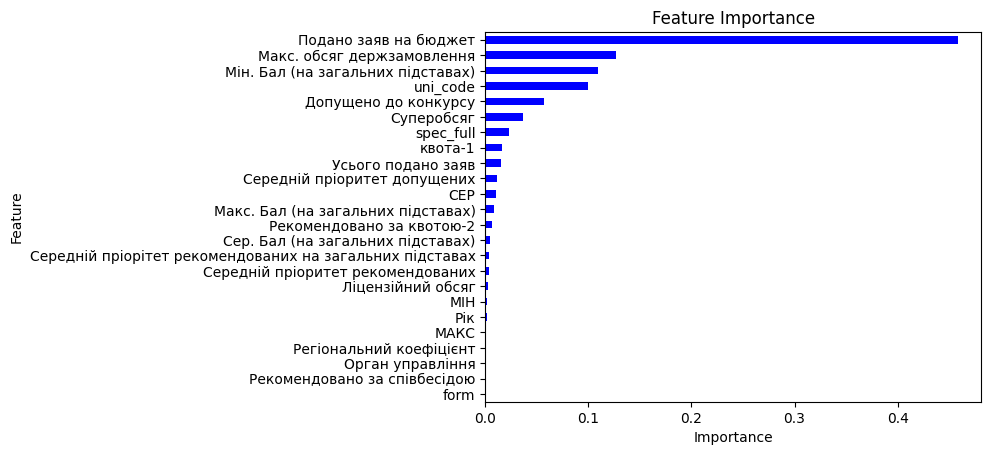

In [16]:
importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [12]:
gbr_params = {'max_depth': range(5, 30, 3),
              'random_state': [1],
              'n_estimators': range(3, 180, 20),
              'max_features': range(10, 20, 2),
              'learning_rate': [0.1, 0.2, 0.5, 1]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 9556.318336248398
{'learning_rate': 0.2, 'max_depth': 5, 'max_features': 12, 'n_estimators': 163, 'random_state': 1}
MSE: 41.76916892101864 	R2 score: 0.9730813818567982


In [6]:
gbr_params = {'max_depth': range(4, 8),
              'random_state': [1],
              'n_estimators': range(140, 171, 2),
              'max_features': range(10, 15),
              'learning_rate': [0.006, 0.15, 0.2, 0.25]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 7030.227018117905
{'learning_rate': 0.15, 'max_depth': 6, 'max_features': 12, 'n_estimators': 170, 'random_state': 1}
MSE: 44.065993783053116 	R2 score: 0.9716011668321749


In [7]:
gbr_params = {'max_depth': range(5, 7),
              'random_state': [1],
              'n_estimators': range(160, 180, 2),
              'max_features': [12],
              'learning_rate': [0.006, 0.15]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 227.0563464164734
{'learning_rate': 0.15, 'max_depth': 6, 'max_features': 12, 'n_estimators': 178, 'random_state': 1}
MSE: 43.92401231867627 	R2 score: 0.9716926684090964


In [8]:
gbr_params = {'max_depth': [6],
              'random_state': [1],
              'n_estimators': range(175, 200, 2),
              'max_features': [12],
              'learning_rate': [0.1, 0.15]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 177.40692567825317
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 12, 'n_estimators': 199, 'random_state': 1}
MSE: 40.55010147092546 	R2 score: 0.9738670238034195


In [5]:
gbr_params = {'max_depth': [6],
              'random_state': [1],
              'n_estimators': range(200, 1600, 100),
              'max_features': [12],
              'learning_rate': [0.1]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 547.4983847141266
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 12, 'n_estimators': 1500, 'random_state': 1}
MSE: 36.98671243217521 	R2 score: 0.9761634905828082


In [6]:
gbr_params = {'max_depth': [6],
              'random_state': [1],
              'n_estimators': [1500, 2000, 3000, 5000],
              'max_features': [12],
              'learning_rate': [0.1]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 692.6637182235718
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 12, 'n_estimators': 5000, 'random_state': 1}
MSE: 36.89107284200161 	R2 score: 0.976225126609422


In [7]:
gbr_params = {'max_depth': [6],
              'random_state': [1],
              'n_estimators': [5000, 10000],
              'max_features': [12],
              'learning_rate': [0.1]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 1108.9816732406616
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 12, 'n_estimators': 10000, 'random_state': 1}
MSE: 36.8898952844297 	R2 score: 0.9762258854998533


In [8]:
gbr_params = {'max_depth': [5, 6, 10],
              'random_state': [1],
              'n_estimators': [5000],
              'max_features': [12],
              'learning_rate': [0.1]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 755.538521528244
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 12, 'n_estimators': 5000, 'random_state': 1}
MSE: 36.89107284200161 	R2 score: 0.976225126609422


In [4]:
gbr_params = {'max_depth': [6],
              'random_state': [1],
              'n_estimators': [5000],
              'max_features': [12],
              'learning_rate': [0.01, 0.05, 0.1]
              }

gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
start = time()
gbr_grid.fit(X_train_std, y_train)
print('Time:', time() - start)
print(gbr_grid.best_params_)

y_pred = gbr_grid.best_estimator_.predict(X_test_std)
print_results(y_test, y_pred)

Time: 799.3297879695892
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 12, 'n_estimators': 5000, 'random_state': 1}
MSE: 36.89107284200161 	R2 score: 0.976225126609422


In [5]:
best_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, max_features=12, n_estimators=5000, random_state=1)
best_gbr.fit(X_train_std, y_train)

y_pred = best_gbr.predict(X_test_std)

print_results(y_test, y_pred)

MSE: 36.89107284200161 	R2 score: 0.976225126609422


In [6]:
joblib.dump(best_gbr, '../saved_models/gradient_boosting_regressor.sav')

['../saved_models/gradient_boosting_regressor.sav']

Text(0.5, 1.0, 'Feature Importance')

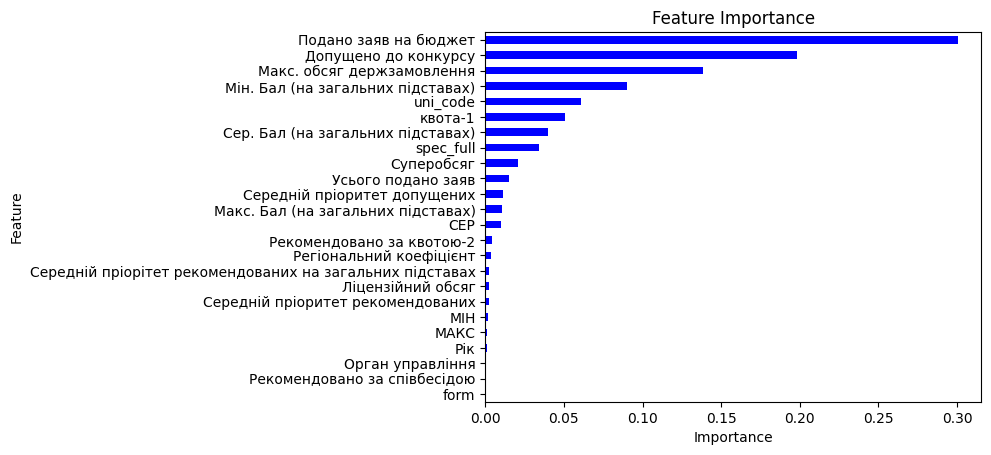

In [8]:
importances = pd.Series(best_gbr.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")